#Read Data

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv('/content/drive/MyDrive/303Proj/odi.csv')
df.head()
#df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


#EDA

In [78]:
df.shape

(350899, 15)

##Checking MissValues

In [79]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [81]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


##correlation

In [82]:
#sns.heatmap(data, annot=True, cmap='coolwarm', square=True)
##
#sns.heatmap(df, cmap='coolwarm', annot=True)
#plt.show()
#df.corr()

In [83]:
#here I extract Year, Month and Day from Date column
df['date']=pd.to_datetime(df['date'])
df['date'].dt.year
df['date'].dt.month
df['date'].dt.day
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.month


In [84]:
df.corr()

<ipython-input-84-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day
mid,1.000000,0.038262,-0.023003,0.005770,0.065211,-0.003811,0.062887,0.038808,0.117010,0.983284,0.092776,0.092776
runs,0.038262,1.000000,0.598875,0.931473,0.647093,0.215938,0.572680,0.277120,0.316891,0.044493,-0.019952,-0.019952
wickets,-0.023003,0.598875,1.000000,0.756038,0.168192,0.492133,0.067412,-0.172466,-0.304311,-0.028208,0.015262,0.015262
overs,0.005770,0.931473,0.756038,1.000000,0.496190,0.242566,0.491282,0.208318,0.086654,0.006124,-0.003650,-0.003650
runs_last_5,0.065211,0.647093,0.168192,0.496190,1.000000,-0.021467,0.562481,0.439263,0.426608,0.076374,-0.032623,-0.032623
wickets_last_5,-0.003811,0.215938,0.492133,0.242566,-0.021467,1.000000,-0.207187,-0.468785,-0.191498,-0.006129,0.009058,0.009058
striker,0.062887,0.572680,0.067412,0.491282,0.562481,-0.207187,1.000000,0.542781,0.368623,0.070640,-0.020283,-0.020283
non-striker,0.038808,0.277120,-0.172466,0.208318,0.439263,-0.468785,0.542781,1.000000,0.321307,0.047876,-0.034071,-0.034071
total,0.117010,0.316891,-0.304311,0.086654,0.426608,-0.191498,0.368623,0.321307,1.000000,0.140008,-0.063281,-0.063281
year,0.983284,0.044493,-0.028208,0.006124,0.076374,-0.006129,0.070640,0.047876,0.140008,1.000000,-0.040363,-0.040363


#Data Preprocessing

In [85]:
df["bat_team"].value_counts()

Australia               44876
Sri Lanka               42787
India                   33435
England                 32201
South Africa            31962
Pakistan                31658
New Zealand             30152
Bangladesh              23940
West Indies             23907
Zimbabwe                21179
Afghanistan              7564
Ireland                  7529
Scotland                 5968
Kenya                    2976
Canada                   2406
Netherlands              2178
United Arab Emirates     2006
Bermuda                  1768
Hong Kong                1189
Asia XI                   934
Papua New Guinea          284
Name: bat_team, dtype: int64

In [86]:
#Consistentchange teams

In [87]:
consistent_team = ['England', 'Pakistan', 'Sri Lanka', 'Australia', 'South Africa', 'New Zealand', 'Bangladesh', 'Zimbabwe','West Indies', 'India', 'Scotland','Afghanistan']

In [88]:
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]


In [89]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day
315,2,2006-09-05,The Rose Bowl,England,Pakistan,ME Trescothick,Shoaib Akhtar,0,1,0.1,0,1,0,0,271,2006,9,9
316,2,2006-09-05,The Rose Bowl,England,Pakistan,IR Bell,Shoaib Akhtar,1,1,0.2,1,1,1,0,271,2006,9,9
317,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,1,1,0.3,1,1,1,0,271,2006,9,9
318,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,5,1,0.4,5,1,4,1,271,2006,9,9
319,2,2006-09-05,The Rose Bowl,England,Pakistan,AJ Strauss,Shoaib Akhtar,6,1,0.5,6,1,5,1,271,2006,9,9


plot

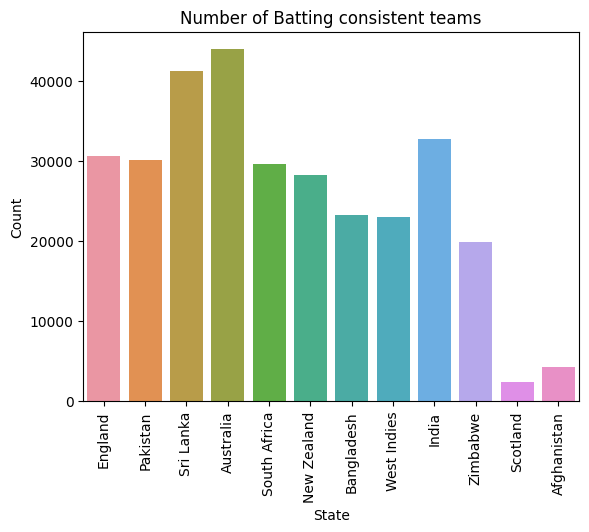

In [90]:
sns.countplot(df, x='bat_team')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Batting consistent teams')
plt.xticks(rotation=90)
plt.show()

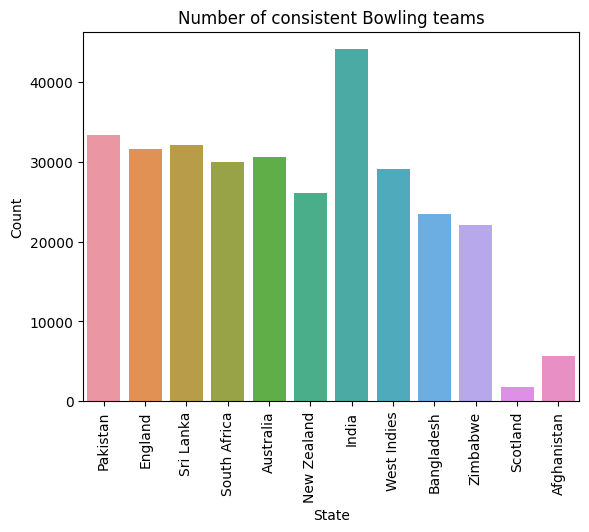

In [91]:
sns.countplot(df, x='bowl_team')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of consistent Bowling teams')
plt.xticks(rotation=90)
plt.show()

venue


In [92]:
df["venue"].value_counts()

Shere Bangla National Stadium                                                    23274
Harare Sports Club                                                               13965
R Premadasa Stadium                                                              11387
Queens Sports Club                                                                8980
Sheikh Zayed Stadium                                                              8196
                                                                                 ...  
Sharjah Cricket Association Stadium                                                303
Keenan Stadium                                                                     300
Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium      295
Sheikhupura Stadium                                                                291
ICC Academy                                                                        278
Name: venue, Length: 124, dtype: int64

In [93]:
venues = df["venue"].value_counts()[df["venue"].value_counts() > 11000].index.tolist()##

In [94]:
df = df[df["venue"].isin(venues)]


In [95]:
df["wickets_left"] = 10-df["wickets"]
#wic left

<ipython-input-95-b9d3ae91f850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wickets_left"] = 10-df["wickets"]


In [96]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day,wickets_left
53089,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,0,0,0.1,0,0,0,0,146,2006,12,12,10
53090,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,0,0,0.2,0,0,0,0,146,2006,12,12,10
53091,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,1,0,0.3,1,0,1,0,146,2006,12,12,10
53092,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,CJ Chibhabha,Mashrafe Mortaza,1,0,0.4,1,0,1,0,146,2006,12,12,10
53093,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,CJ Chibhabha,Mashrafe Mortaza,1,0,0.5,1,0,1,0,146,2006,12,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342551,1159,2016-10-01,Shere Bangla National Stadium,Bangladesh,Afghanistan,Mashrafe Mortaza,Mirwais Ashraf,270,8,49.2,32,2,25,2,279,2016,10,10,2
342552,1159,2016-10-01,Shere Bangla National Stadium,Bangladesh,Afghanistan,Mahmudullah,Mirwais Ashraf,274,8,49.3,35,2,29,0,279,2016,10,10,2
342553,1159,2016-10-01,Shere Bangla National Stadium,Bangladesh,Afghanistan,Mahmudullah,Mirwais Ashraf,276,8,49.4,37,2,31,0,279,2016,10,10,2
342554,1159,2016-10-01,Shere Bangla National Stadium,Bangladesh,Afghanistan,Mahmudullah,Mirwais Ashraf,277,8,49.5,37,2,32,0,279,2016,10,10,2


In [97]:
#Ball_left

df["over"] = df["overs"].apply(lambda x: str(x).split(".")[0])
df["ball_no"] = df["overs"].apply(lambda x: str(x).split(".")[1])
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,wickets_last_5,striker,non-striker,total,year,month,day,wickets_left,over,ball_no
53089,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,0,0,0.1,...,0,0,0,146,2006,12,12,10,0,1
53090,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,0,0,0.2,...,0,0,0,146,2006,12,12,10,0,2
53091,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,1,0,0.3,...,0,1,0,146,2006,12,12,10,0,3
53092,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,CJ Chibhabha,Mashrafe Mortaza,1,0,0.4,...,0,1,0,146,2006,12,12,10,0,4
53093,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,CJ Chibhabha,Mashrafe Mortaza,1,0,0.5,...,0,1,0,146,2006,12,12,10,0,5


In [98]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [99]:
df['balls_left'] = 300 - df['balls_bowled']


In [100]:
#appendRunRate

df["runrate"] = ((df["runs"]*6) / df["balls_bowled"])
df["runrate"]


53089     0.000000
53090     0.000000
53091     2.000000
53092     1.500000
53093     1.200000
            ...   
342551    5.472973
342552    5.535354
342553    5.557047
342554    5.558528
342555    5.580000
Name: runrate, Length: 23274, dtype: float64

In [101]:
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,...,total,year,month,day,wickets_left,over,ball_no,balls_bowled,balls_left,runrate
53089,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,0,0,0.1,...,146,2006,12,12,10,0,1,1,299,0.0
53090,179,2006-12-08,Shere Bangla National Stadium,Zimbabwe,Bangladesh,TMK Mawoyo,Mashrafe Mortaza,0,0,0.2,...,146,2006,12,12,10,0,2,2,298,0.0


mid

In [102]:
df = (df[['mid','bat_team','bowl_team', 'venue','runs','balls_bowled','batsman','bowler','wickets_left','runrate','balls_left','runs_last_5', 'total','year' ]]).round(1)#######runrate'day
df.head(10)

,mid,bat_team,bowl_team,venue,runs,balls_bowled,batsman,bowler,wickets_left,runrate,balls_left,runs_last_5,total,year
53089,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,0,1,TMK Mawoyo,Mashrafe Mortaza,10,0.0,299,0,146,2006
53090,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,0,2,TMK Mawoyo,Mashrafe Mortaza,10,0.0,298,0,146,2006
53091,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,3,TMK Mawoyo,Mashrafe Mortaza,10,2.0,297,1,146,2006
53092,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,4,CJ Chibhabha,Mashrafe Mortaza,10,1.5,296,1,146,2006
53093,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,5,CJ Chibhabha,Mashrafe Mortaza,10,1.2,295,1,146,2006
53094,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,6,CJ Chibhabha,Mashrafe Mortaza,10,1.0,294,1,146,2006
53095,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,7,TMK Mawoyo,Shahadat Hossain,10,0.9,293,1,146,2006
53096,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,8,TMK Mawoyo,Shahadat Hossain,10,0.8,292,1,146,2006
53097,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,9,TMK Mawoyo,Shahadat Hossain,10,0.7,291,1,146,2006
53098,179,Zimbabwe,Bangladesh,Shere Bangla National Stadium,2,9,TMK Mawoyo,Shahadat Hossain,10,1.3,291,2,146,2006


scatterPlot

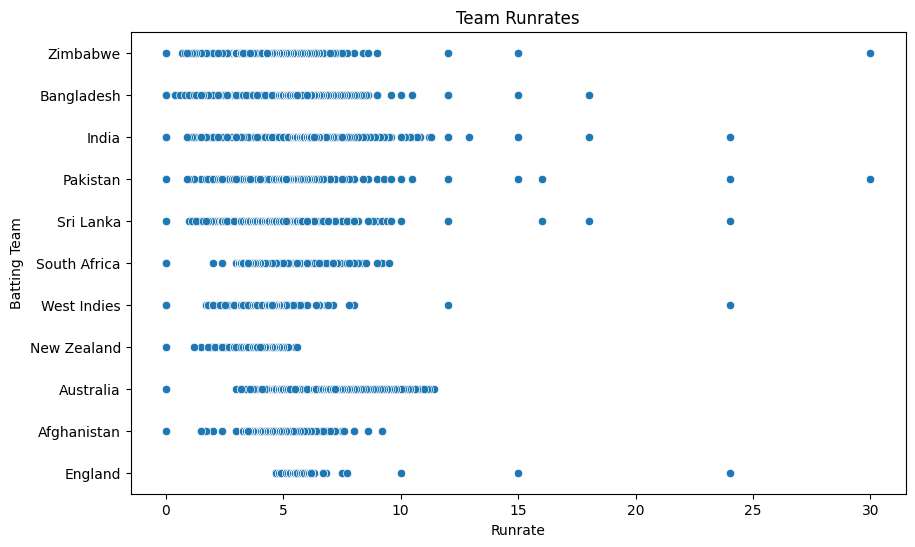

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, y='bat_team', x='runrate')
plt.ylabel('Batting Team')
plt.xlabel('Runrate')
plt.title('Team Runrates')
plt.show()

In [104]:
new_df=df
new_df.isnull().sum()

mid             0
bat_team        0
bowl_team       0
venue           0
runs            0
balls_bowled    0
batsman         0
bowler          0
wickets_left    0
runrate         0
balls_left      0
runs_last_5     0
total           0
year            0
dtype: int64

In [105]:
new_df.drop(["mid", "balls_bowled"], axis=1, inplace=True)

In [106]:
new_df

,bat_team,bowl_team,venue,runs,batsman,bowler,wickets_left,runrate,balls_left,runs_last_5,total,year
53089,Zimbabwe,Bangladesh,Shere Bangla National Stadium,0,TMK Mawoyo,Mashrafe Mortaza,10,0.0,299,0,146,2006
53090,Zimbabwe,Bangladesh,Shere Bangla National Stadium,0,TMK Mawoyo,Mashrafe Mortaza,10,0.0,298,0,146,2006
53091,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,TMK Mawoyo,Mashrafe Mortaza,10,2.0,297,1,146,2006
53092,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,CJ Chibhabha,Mashrafe Mortaza,10,1.5,296,1,146,2006
53093,Zimbabwe,Bangladesh,Shere Bangla National Stadium,1,CJ Chibhabha,Mashrafe Mortaza,10,1.2,295,1,146,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
342551,Bangladesh,Afghanistan,Shere Bangla National Stadium,270,Mashrafe Mortaza,Mirwais Ashraf,2,5.5,4,32,279,2016
342552,Bangladesh,Afghanistan,Shere Bangla National Stadium,274,Mahmudullah,Mirwais Ashraf,2,5.5,3,35,279,2016
342553,Bangladesh,Afghanistan,Shere Bangla National Stadium,276,Mahmudullah,Mirwais Ashraf,2,5.6,2,37,279,2016
342554,Bangladesh,Afghanistan,Shere Bangla National Stadium,277,Mahmudullah,Mirwais Ashraf,2,5.6,1,37,279,2016


In [107]:
#converts strings
#df1 = pd.get_dummies( new_df, columns = ['bat_team','bowl_team', 'venue'])
import numpy as np
pd.np.random.seed(42)
df1 =new_df.sample(frac=1).reset_index(drop=True)

<ipython-input-107-4c465be356fc>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.random.seed(42)


Heatmap of Features

<ipython-input-108-0bf2bd0e9fe7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt='.0%')


<Axes: >

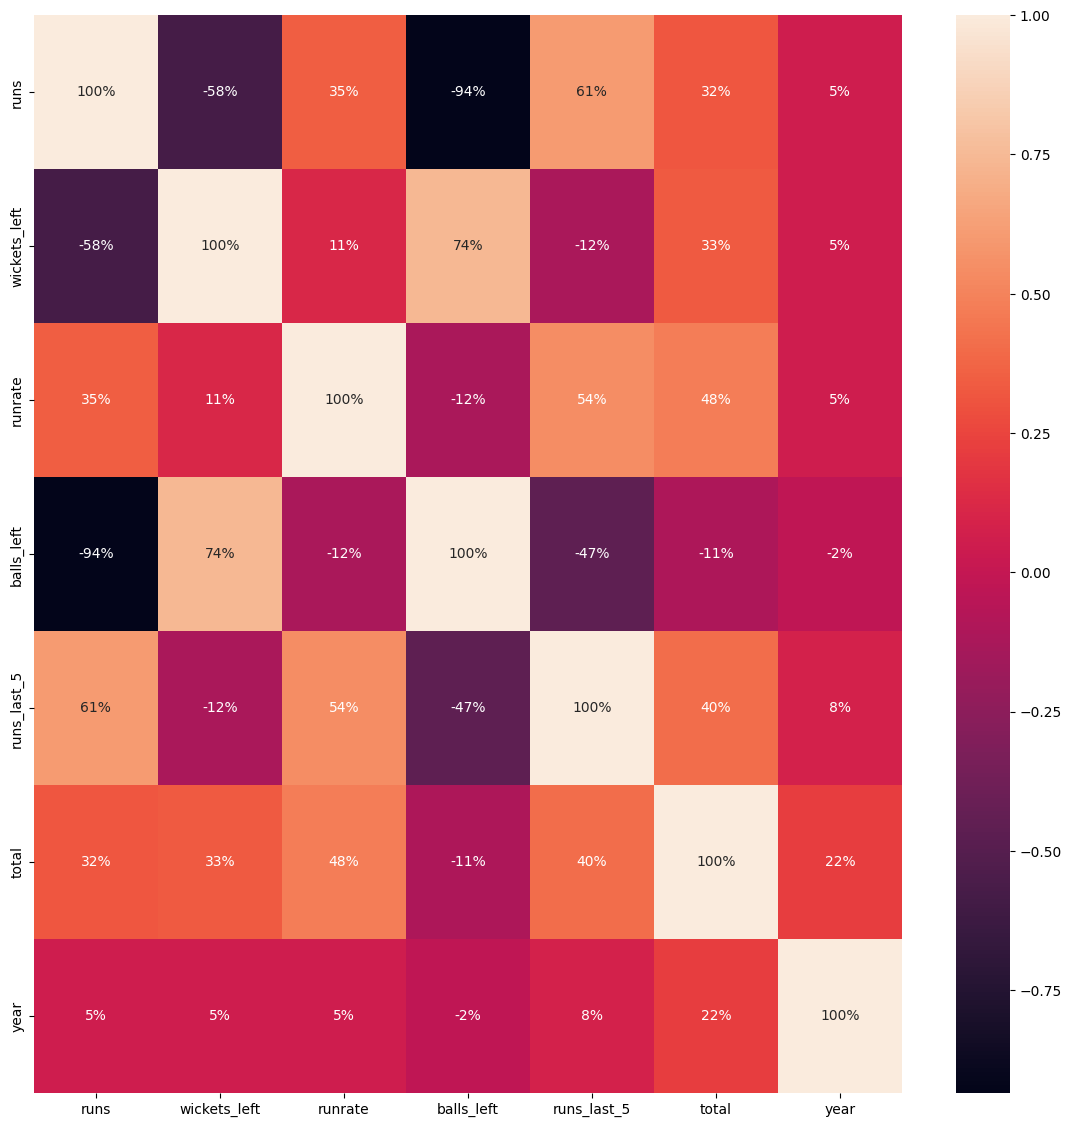

In [108]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

In [109]:
# Use pandas get_dummies to perform one-hot encoding
df1 = pd.get_dummies(new_df, columns=['bat_team', 'bowl_team','venue','runrate','batsman','bowler'], drop_first=True)##,


In [110]:
df1.head(4)

,runs,wickets_left,balls_left,runs_last_5,total,year,bat_team_Australia,bat_team_Bangladesh,bat_team_England,bat_team_India,...,bowler_V Kohli,bowler_V Permaul,bowler_V Sehwag,bowler_V Sibanda,bowler_Wahab Riaz,bowler_XJ Doherty,bowler_YK Pathan,bowler_Younis Khan,bowler_Yuvraj Singh,bowler_Z Khan
53089,0,10,299,0,146,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53090,0,10,298,0,146,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53091,1,10,297,1,146,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53092,1,10,296,1,146,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df1.head(2)

,runs,wickets_left,balls_left,runs_last_5,total,year,bat_team_Australia,bat_team_Bangladesh,bat_team_England,bat_team_India,...,bowler_V Kohli,bowler_V Permaul,bowler_V Sehwag,bowler_V Sibanda,bowler_Wahab Riaz,bowler_XJ Doherty,bowler_YK Pathan,bowler_Younis Khan,bowler_Yuvraj Singh,bowler_Z Khan
53089,0,10,299,0,146,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53090,0,10,298,0,146,2006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#MODEL APPLY

##Linear Regression

In [112]:
Y1 = df1.total
X1 = df1.drop('total', axis=1)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)

(18619, 585)
(4655, 585)


In [115]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [116]:
y_predict = lr_model.predict(X_test)
y_predict

array([151.46285629, 282.02997589, 256.77618027, ..., 246.67607117,
       262.71350861, 299.29499054])

In [117]:
test_accuracy = lr_model.score(X_test, y_test)
test_accuracy

0.8401026307177976

In [118]:
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

0.8423500602644939

In [119]:
# checking for scores
from sklearn import metrics

# checking for scores

from sklearn import metrics

import numpy as np
prediction = lr_model.predict(X_test)

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('R2 Score: ', metrics.r2_score(y_test, prediction))



MAE:  16.28800617386012
MSE:  527.9906805181841
RMSE:  22.97804779606362
R2 Score:  0.8401026307177976


In [120]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


Lesso,Ridge

In [121]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

###ridge

In [122]:
 ridge = Ridge(alpha=5)
 ridge.fit(X_train,y_train)
 print ("Ridge model:", (ridge.coef_))

Ridge model: [ 5.43571806e-01  1.01650527e+01  1.64670420e-01 -2.06019507e-01
  3.27110987e+00  8.08716152e+01  3.46739972e+01  6.51587402e+01
  6.54947757e+01  2.71468851e+01  4.63777902e+01  1.30937250e+01
  1.76782979e+01  1.87679535e+01  1.47423819e+00  1.39434832e+01
 -3.55705349e+00  1.90449518e+00  2.28341461e+01 -6.70774422e+00
  8.88573725e+00 -3.18175185e+01 -1.98831524e+00 -1.39636182e+01
  1.07445957e+01 -2.54055282e+01 -2.15484082e+01 -3.64505631e+01
 -1.59274498e+01 -1.01747492e+01 -1.00708215e+01 -1.58603174e+01
 -2.77276404e+01 -2.47539344e-01  2.09328870e-01 -8.12015367e+00
 -9.68529318e+00 -3.51803864e+00 -6.90852465e+00 -7.30217665e+00
 -4.18975722e+00 -3.64753702e+00 -1.01679741e+01 -1.21529668e+01
 -1.37271852e+01 -1.76810557e+01 -4.77295024e+00 -4.05758036e+00
 -1.11298384e+00  1.61898486e+00  1.05868748e+01  3.87595289e+00
  4.90130883e+00  5.00540093e+00  2.83067577e+00  3.14376430e+00
  5.71863168e+00  5.01787571e+00  2.15592446e+00  3.35774398e+00
  3.78283193

In [123]:
 print(ridge.score(X_train, y_train))
 print(ridge.score(X_test, y_test))

0.8369279828874865
0.8336748055423594


In [124]:
prediction = ridge.predict(X_test)

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('R2 Score: ', metrics.r2_score(y_test, prediction))


MAE:  16.88341625108524
MSE:  549.2157438439087
RMSE:  23.435352436946808
R2 Score:  0.8336748055423594


##Naive Bayes

###Gaussian Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [126]:
X_train

,runs,wickets_left,balls_left,runs_last_5,year,bat_team_Australia,bat_team_Bangladesh,bat_team_England,bat_team_India,bat_team_New Zealand,...,bowler_V Kohli,bowler_V Permaul,bowler_V Sehwag,bowler_V Sibanda,bowler_Wahab Riaz,bowler_XJ Doherty,bowler_YK Pathan,bowler_Younis Khan,bowler_Yuvraj Singh,bowler_Z Khan
199284,18,9,271,17,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258651,143,6,120,26,2014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123023,126,7,160,23,2009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79717,45,6,220,22,2008,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263432,49,10,220,20,2014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262282,96,7,170,11,2014,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
53168,40,7,228,14,2006,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196063,25,9,257,20,2012,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
220167,37,10,246,24,2012,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.8818474758324383


In [128]:
predictions = model.predict(X_train)

# Calculate accuracy
accuracy = np.sum(predictions == y_train) / len(y_train)

print('Accuracy:', accuracy)

Accuracy: 0.8933884741393201


In [129]:


# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('R2 Score: ', metrics.r2_score(y_test, prediction))


MAE:  16.88341625108524
MSE:  549.2157438439087
RMSE:  23.435352436946808
R2 Score:  0.8336748055423594


##random forest

In [130]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)


RandomForestRegressor()

In [131]:
#R2_train test
train_accuracy = r2_score(y_train, model2.predict(X_train))

print('Training r2:', train_accuracy)

Training r2: 0.9985963951001589


In [132]:
test_accuracy = r2_score(y_test, model2.predict(X_test))

print('Test r2:', test_accuracy)

Test r2: 0.9922419046916373


In [133]:
model2.score(X_train, y_train)

0.9985963951001589

In [134]:
y_pred = model2.predict(X_test)

# Calculate the MSE, R2, MAE, and RMSE
mse = np.mean((y_pred - y_test)**2)
r2 = model2.score(X_test, y_test)
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(mse)

# Print the results
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 25.617694898769667
R2: 0.9922419046916373
MAE: 1.5268625159838367
RMSE: 5.061392584928546


In [135]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the data

# Split the data into train and test sets

# Initialize a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=100)

# Train the model on the train set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the training and test mean squared errors (MSEs)
train_mse = np.mean((rf.predict(X_train) - y_train)**2)
test_mse = np.mean((rf.predict(X_test) - y_test)**2)

# Calculate the epoch
epoch = train_mse / test_mse

# Print the epoch
print("Epoch:", epoch)

Epoch: 0.1821422665719694


#ElasticNet

In [136]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create the elastic net model
modelE = ElasticNet(alpha=0.5, l1_ratio=0.5)#tuned

# Train the model
modelE.fit(X_train, y_train)

# Make predictions on the test set


ElasticNet(alpha=0.5)

In [137]:
predictions = modelE.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)


r2 = r2_score(y_test, prediction)
print("R-squire", r2)
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 1344.713836283276
R-squire 0.8336748055423594
MAE: 1.5201168022096054
RMSE: 36.67034000774026


In [138]:
en = ElasticNet(alpha=0.1)

# Train the model on the train set
en.fit(X_train, y_train)

# Make predictions on the test set
y_pred = en.predict(X_test)

# Calculate the MSE, R2, MAE, and RMSE
mse = np.mean((y_pred - y_test)**2)
r2 = en.score(X_test, y_test)
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(mse)

# Print the results
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 1096.8038432180767
R2: 0.6678425290062677
MAE: 24.270625284109467
RMSE: 33.1180289754399
